## Data Collection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("Subscription_Service_Churn_Dataset.csv")
df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,42,11.321950,475.521914,Basic,Electronic check,Yes,Movies,Yes,Tablet,0.386852,...,25,Comedy,3.489465,7,Female,15,No,No,LOHRYYC9E8,0
1,95,12.810915,1217.036887,Standard,Electronic check,Yes,TV Shows,No,Mobile,37.123000,...,21,Comedy,2.251860,3,Male,8,No,NaN,RIH7RFEZCS,0
2,6,NaN,91.583304,Standard,Credit card,Yes,TV Shows,No,Tablet,30.716944,...,29,Fantasy,NaN,4,Male,14,No,Yes,JB5J8X2UY1,1
3,54,17.917819,967.562224,Basic,NaN,Yes,Movies,No,Mobile,2.495373,...,45,Drama,1.275004,3,Male,12,No,NaN,Z4GZJIB90P,0
4,27,NaN,339.057244,Basic,Mailed check,No,TV Shows,No,Mobile,39.936910,...,44,Comedy,3.236230,4,Female,18,No,NaN,B3BDJTW0L9,0


## Data Cleaning and Preparation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AccountAge                963 non-null    int64  
 1   MonthlyCharges            759 non-null    float64
 2   TotalCharges              777 non-null    float64
 3   SubscriptionType          913 non-null    object 
 4   PaymentMethod             740 non-null    object 
 5   PaperlessBilling          963 non-null    object 
 6   ContentType               963 non-null    object 
 7   MultiDeviceAccess         963 non-null    object 
 8   DeviceRegistered          887 non-null    object 
 9   ViewingHoursPerWeek       963 non-null    float64
 10  AverageViewingDuration    963 non-null    float64
 11  ContentDownloadsPerMonth  963 non-null    int64  
 12  GenrePreference           853 non-null    object 
 13  UserRating                702 non-null    float64
 14  SupportTic

In [ ]:
df.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,963.000000,759.000000,777.000000,963.000000,963.000000,963.000000,702.000000,963.000000,963.000000,963.000000
mean,57.515057,12.328262,714.052121,21.029241,90.741877,24.694704,2.923945,4.455867,11.900312,0.175493
std,33.662575,4.260861,511.071322,11.318164,49.923719,14.319572,1.165992,2.935706,7.117402,0.380586
min,1.000000,5.062339,11.582882,0.315317,5.028412,0.000000,1.000181,0.000000,0.000000,0.000000
25%,29.000000,8.816669,318.425396,11.621961,47.777701,13.000000,1.922235,2.000000,6.000000,0.000000
50%,55.000000,12.169888,614.196606,21.334100,89.878241,25.000000,2.898328,5.000000,12.000000,0.000000
75%,86.000000,15.937606,1021.436452,30.419851,134.353824,37.000000,3.953953,7.000000,18.000000,0.000000
max,119.000000,19.932542,2261.019201,39.949086,179.752024,49.000000,4.997348,9.000000,24.000000,1.000000


In [ ]:
df.isnull().sum()

,0
AccountAge,0
MonthlyCharges,204
TotalCharges,186
SubscriptionType,50
PaymentMethod,223
PaperlessBilling,0
ContentType,0
MultiDeviceAccess,0
DeviceRegistered,76
ViewingHoursPerWeek,0


In [ ]:
df.columns=df.columns.str.lower()


In [ ]:
df.drop("subtitlesenabled",axis=1,inplace=True)

In [ ]:
df['gender'].fillna(df['gender'].mode()[0],inplace=True)
df['subscriptiontype'].fillna("Standard",inplace=True)
df.isnull().sum()

,0
accountage,0
monthlycharges,204
totalcharges,186
subscriptiontype,0
paymentmethod,223
paperlessbilling,0
contenttype,0
multideviceaccess,0
deviceregistered,76
viewinghoursperweek,0


In [ ]:
df['genrepreference'] = df.groupby('gender')['genrepreference'].transform(lambda x: x.fillna(x.mode()[0]))
df["deviceregistered"]=df.groupby("subscriptiontype")["deviceregistered"].transform(lambda x:x.fillna(x.mode()[0]))
df['userrating']=df.groupby("genrepreference")['userrating'].transform(lambda x:x.fillna(x.median()))
df['monthlycharges']=df.groupby("subscriptiontype")["monthlycharges"].transform(lambda x:x.fillna(x.mean()))
df['totalcharges']=df.groupby('subscriptiontype')['totalcharges'].transform(lambda x:x.fillna(x.mean()))
df['paymentmethod']=df.groupby('subscriptiontype')['paymentmethod'].transform(lambda x:x.fillna(x.mode()[0]))

In [ ]:
df.isnull().sum()

,0
accountage,0
monthlycharges,0
totalcharges,0
subscriptiontype,0
paymentmethod,0
paperlessbilling,0
contenttype,0
multideviceaccess,0
deviceregistered,0
viewinghoursperweek,0


## Exploratory Data Analysis

In [ ]:
churn_count = (
    df.groupby("subscriptiontype")["churn"].value_counts().unstack(fill_value=0)
)

print(churn_count)


churn               0   1
subscriptiontype         
Basic             238  55
Premium           277  56
Standard          279  58


<Figure size 1000x700 with 0 Axes>

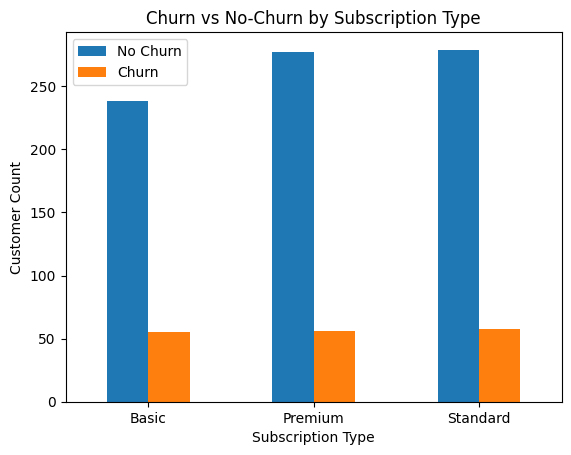

In [ ]:
plt.figure(figsize=(10,7))
churn_count.plot(kind="bar")
plt.title("Churn vs No-Churn by Subscription Type")
plt.xlabel("Subscription Type")
plt.xticks(rotation=0)
plt.ylabel("Customer Count")
plt.legend(["No Churn", "Churn"])
plt.show()


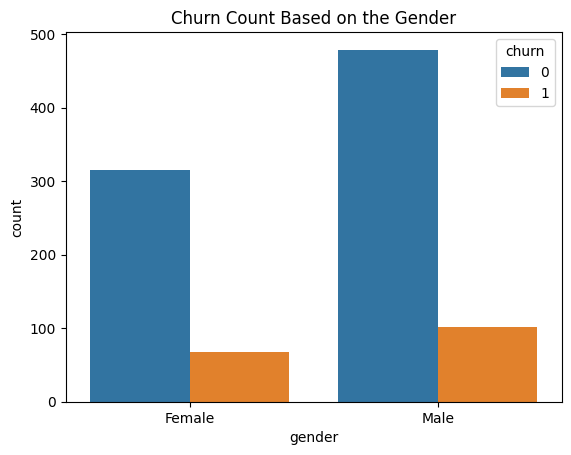

In [ ]:
import seaborn as sns
sns.countplot(x='gender',hue='churn',data=df)
plt.title("Churn Count Based on the Gender")
plt.show()

In [ ]:
df['userrating']=round(df["userrating"],0)

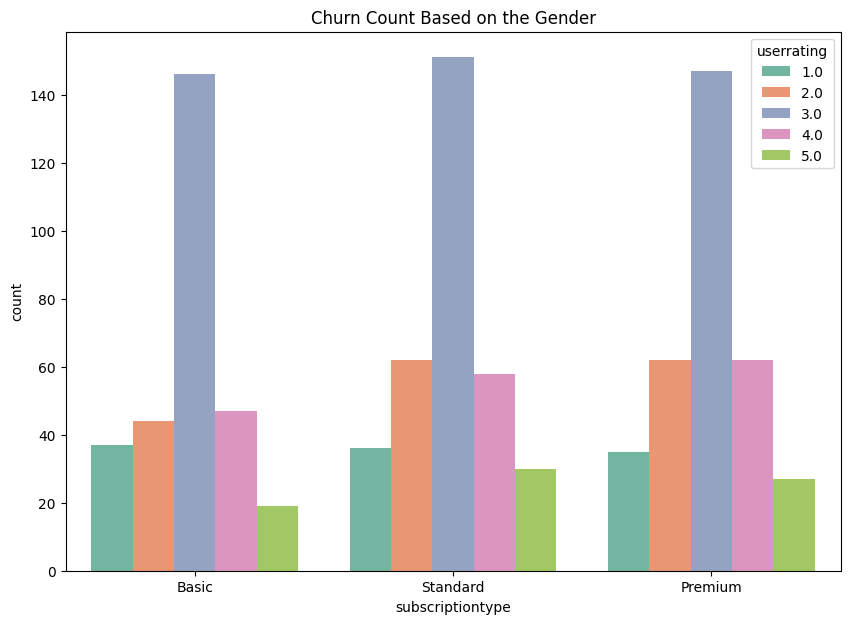

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='subscriptiontype',hue='userrating',data=df,palette="Set2")
plt.title("Churn Count Based on the Gender")
plt.show()

In [ ]:
revenue_by_plan = (
    df.groupby("subscriptiontype")["totalcharges"]
      .sum()
      .sort_values(ascending=False)
)

print(round(revenue_by_plan),0)


subscriptiontype
Standard    246343.0
Premium     236527.0
Basic       204849.0
Name: totalcharges, dtype: float64 0


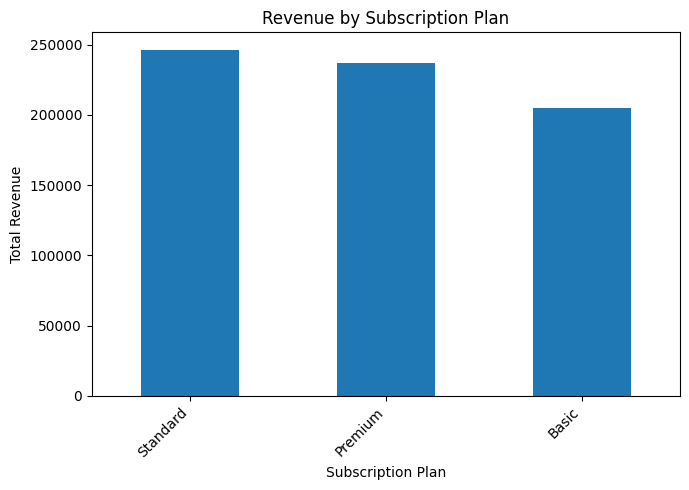

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
revenue_by_plan.plot(kind="bar")

plt.title("Revenue by Subscription Plan")
plt.xlabel("Subscription Plan")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


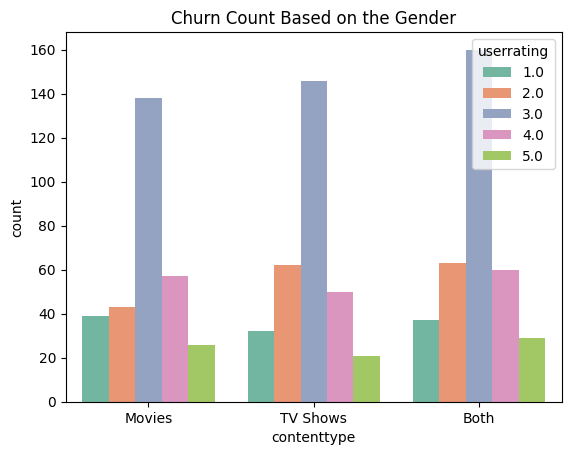

In [ ]:
import seaborn as sns
sns.countplot(x='contenttype',hue='userrating',data=df,palette="Set2")
plt.title("Churn Count Based on the Gender")
plt.show()

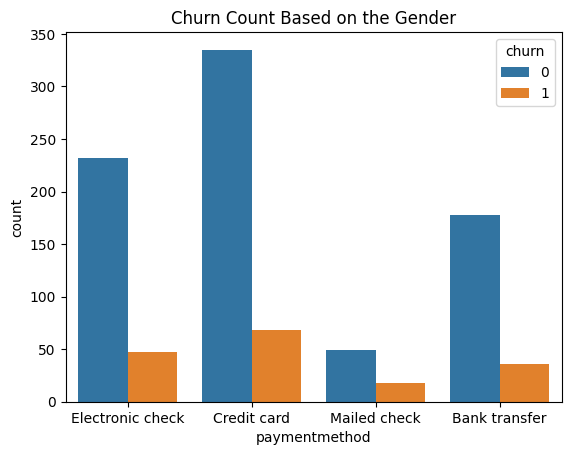

In [ ]:
import seaborn as sns
sns.countplot(x='paymentmethod',hue='churn',data=df)
plt.title("Churn Count Based on the Gender")
plt.show()

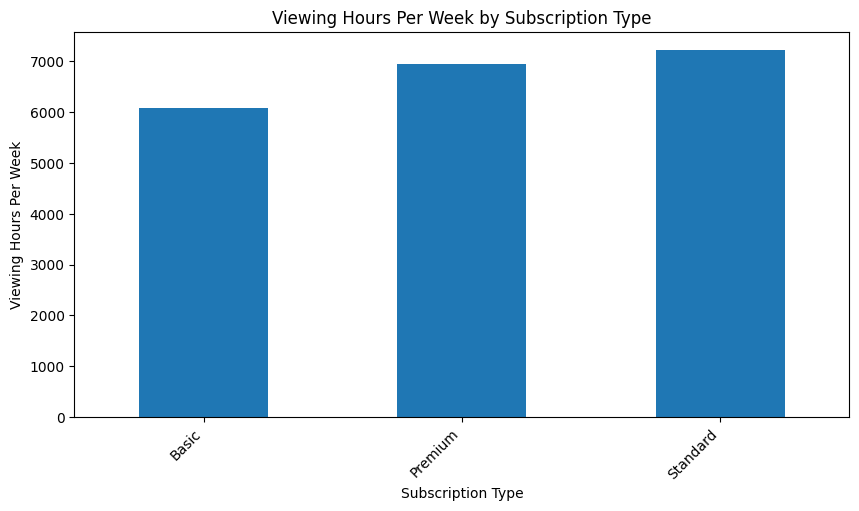

In [ ]:
avg_view = (
    df.groupby('subscriptiontype')['viewinghoursperweek']
      .sum()
)

avg_view.plot(kind='bar', figsize=(10,5))
plt.title("Viewing Hours Per Week by Subscription Type")
plt.xlabel("Subscription Type")
plt.ylabel("Viewing Hours Per Week")
plt.xticks(rotation=45, ha='right')
plt.show()


## Feature Engineering


In [ ]:
df.columns

Index(['accountage', 'monthlycharges', 'totalcharges', 'subscriptiontype',
       'paymentmethod', 'paperlessbilling', 'contenttype', 'multideviceaccess',
       'deviceregistered', 'viewinghoursperweek', 'averageviewingduration',
       'contentdownloadspermonth', 'genrepreference', 'userrating',
       'supportticketspermonth', 'gender', 'watchlistsize', 'parentalcontrol',
       'customerid', 'churn'],
      dtype='object')

In [ ]:
df["tenure_bucket"]=pd.cut(df["accountage"],bins=[0,3,6,12, df["accountage"].max()],labels=["0-3 months","3-6 months","6-12 months","12+ months"])

In [ ]:
df["averageviewingduration"].head()

,averageviewingduration
0,24.593361
1,102.860795
2,10.512415
3,45.246834
4,94.310954


In [ ]:

df['avg_daily_usage_hours'] = df['viewinghoursperweek'] / 7


In [ ]:
df['usage_category'] = pd.cut(
    df['avg_daily_usage_hours'],
    bins=[0, 1, 3, df['avg_daily_usage_hours'].max()],
    labels=['Low', 'Medium', 'High']
)
df["usage_category"].head()

,usage_category
0,Low
1,High
2,High
3,Low
4,High


In [ ]:
df["paymentmethod"].head()
df['auto_renew_flag'] = (
    (df['paperlessbilling'] == 'Yes') &
    (df['paymentmethod'] != 'Electronic Check')
).astype(int)


In [ ]:
df["auto_renew_flag"].head()

,auto_renew_flag
0,1
1,1
2,1
3,1
4,0


In [ ]:
df.columns

Index(['accountage', 'monthlycharges', 'totalcharges', 'subscriptiontype',
       'paymentmethod', 'paperlessbilling', 'contenttype', 'multideviceaccess',
       'deviceregistered', 'viewinghoursperweek', 'averageviewingduration',
       'contentdownloadspermonth', 'genrepreference', 'userrating',
       'supportticketspermonth', 'gender', 'watchlistsize', 'parentalcontrol',
       'customerid', 'churn', 'tenure_bucket', 'avg_daily_usage_hours',
       'usage_category', 'auto_renew_flag'],
      dtype='object')

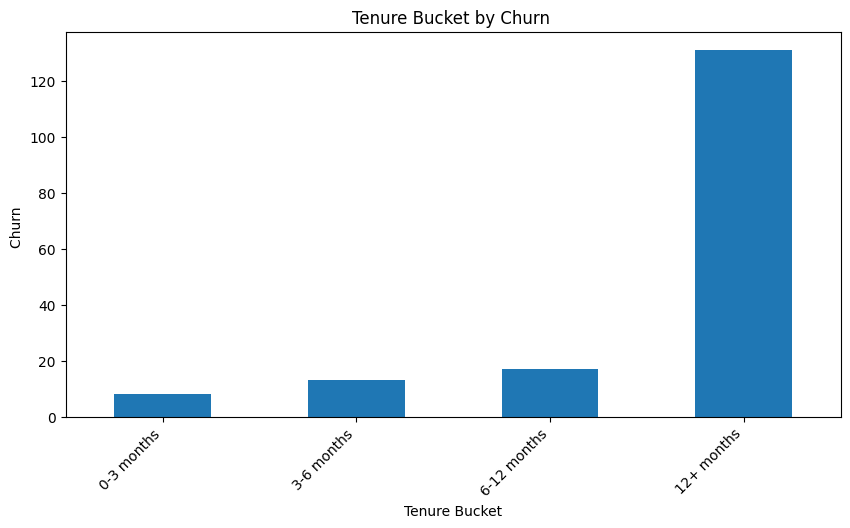

In [ ]:
avg_view = (
    df.groupby('tenure_bucket')['churn']
      .sum()
)

avg_view.plot(kind='bar', figsize=(10,5))
plt.title("Tenure Bucket by Churn ")
plt.xlabel("Tenure Bucket")
plt.ylabel("Churn ")
plt.xticks(rotation=45, ha='right')
plt.show()

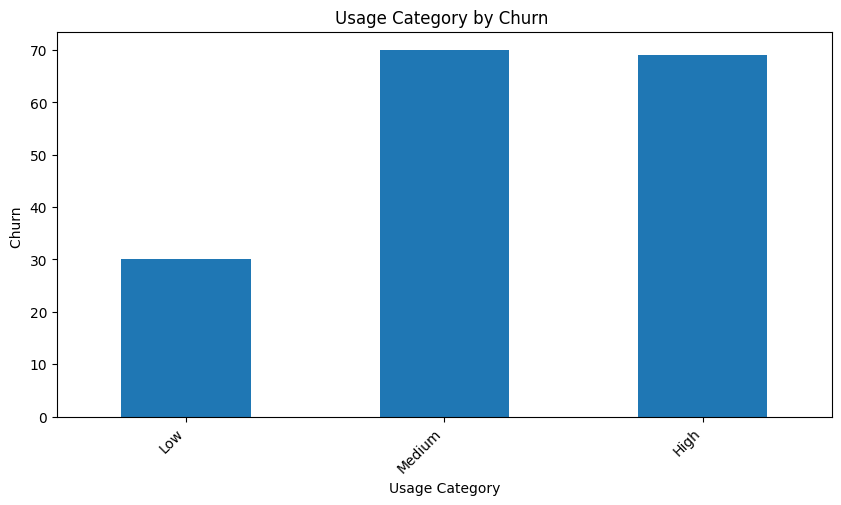

In [ ]:
avg_view = (
    df.groupby('usage_category')['churn']
      .sum()
)

avg_view.plot(kind='bar', figsize=(10,5))
plt.title("Usage Category by Churn ")
plt.xlabel("Usage Category")
plt.ylabel("Churn ")
plt.xticks(rotation=45, ha='right')
plt.show()

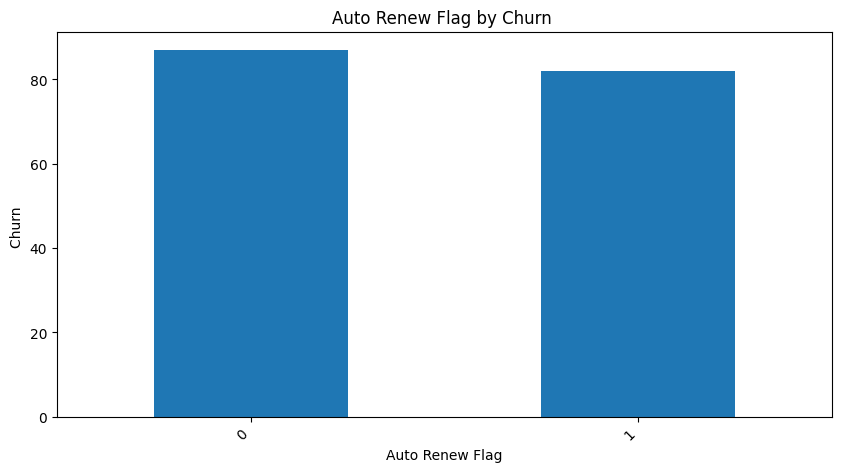

In [ ]:
avg_view = (
    df.groupby('auto_renew_flag')['churn']
      .sum()
)

avg_view.plot(kind='bar', figsize=(10,5))
plt.title("Auto Renew Flag by Churn ")
plt.xlabel("Auto Renew Flag")
plt.ylabel("Churn ")
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
df['churn'] = df['churn'].astype(int)
df = df[df['churn'].notna()]


In [ ]:
df.shape
df['churn'].value_counts()


,count
churn,
0,794
1,169


In [ ]:
cat_cols = [
    'subscriptiontype',
    'paymentmethod',
    'paperlessbilling',
    'contenttype',
    'multideviceaccess',
    'deviceregistered',
    'genrepreference',
    'gender',
    'parentalcontrol'
]


In [ ]:
num_cols = [
    'accountage',
    'monthlycharges',
    'totalcharges',
    'viewinghoursperweek',
    'averageviewingduration',
    'contentdownloadspermonth',
    'supportticketspermonth',
    'watchlistsize',
    'avg_daily_usage_hours',
    'userrating'
]


In [ ]:
numeric_features = [
    'accountage',
    'monthlycharges',
    'totalcharges',
    'viewinghoursperweek',
    'averageviewingduration',
    'contentdownloadspermonth',
    'supportticketspermonth',
    'watchlistsize',
    'avg_daily_usage_hours',
    'userrating',
    'auto_renew_flag'
]

X = df[numeric_features]
y = df['churn']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

log_model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.92      0.72      0.81       159
           1       0.35      0.71      0.47        34

    accuracy                           0.72       193
   macro avg       0.63      0.71      0.64       193
weighted avg       0.82      0.72      0.75       193

ROC-AUC: 0.7486126526082131


In [ ]:
import joblib

joblib.dump(log_model, "churn_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']